<a href="https://colab.research.google.com/github/Harshh18/Computer-Vision-Practicals/blob/main/Exp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

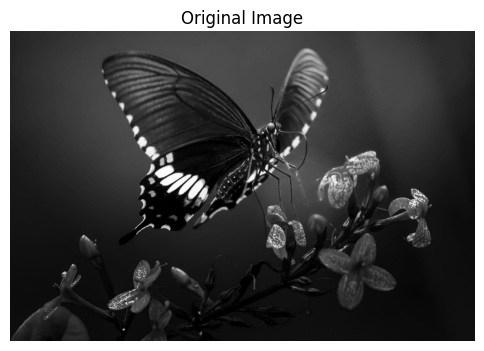

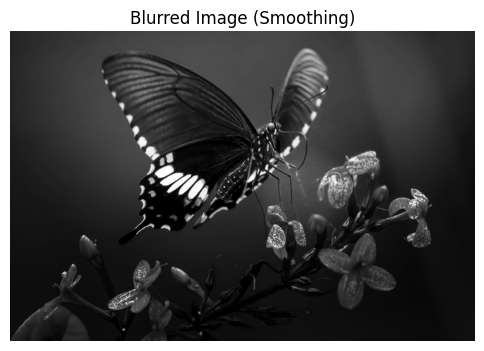

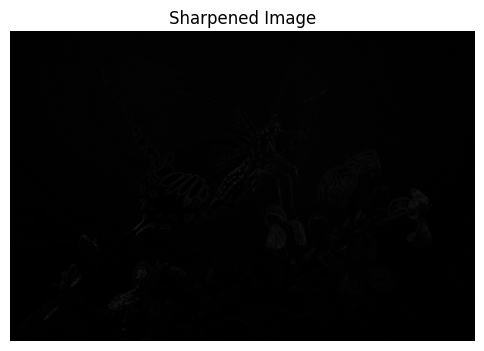

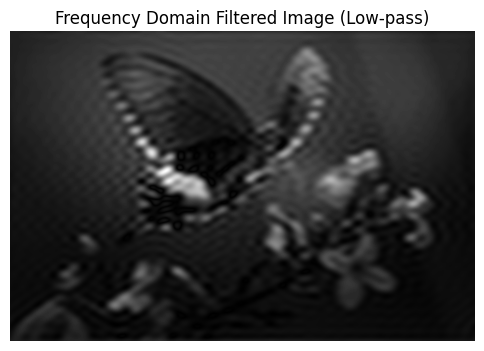

True

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def display_image(image, title="Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Spatial Domain Filters
def apply_spatial_filters(image):
    """Applies spatial filters like smoothing and sharpening to an image."""
    # Smoothing filter (Gaussian blur)
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Sharpening filter (Laplacian)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    sharpened_image = cv2.convertScaleAbs(laplacian)

    return blurred_image, sharpened_image

# Frequency Domain Filters
def apply_frequency_filters(image):
    """Applies frequency domain filters using Fourier transform."""
    # Perform Fourier transform
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    # Create a low-pass filter (Gaussian)
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2  # center
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 1

    # Apply the mask to the frequency domain
    dft_shift_filtered = dft_shift * mask

    # Inverse Fourier transform to get back to spatial domain
    f_ishift = np.fft.ifftshift(dft_shift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    return img_back

# Load image in grayscale
image = cv2.imread('/content/Butterfly-image.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Apply spatial filters (smoothing and sharpening)
blurred_image, sharpened_image = apply_spatial_filters(image)

# Step 2: Apply frequency domain filter (low-pass filtering)
frequency_filtered_image = apply_frequency_filters(image)

# Display original and enhanced images
display_image(image, title="Original Image")
display_image(blurred_image, title="Blurred Image (Smoothing)")
display_image(sharpened_image, title="Sharpened Image")
display_image(frequency_filtered_image, title="Frequency Domain Filtered Image (Low-pass)")

# Save enhanced images
cv2.imwrite('blurred_image.jpg', blurred_image)
cv2.imwrite('sharpened_image.jpg', sharpened_image)
cv2.imwrite('frequency_filtered_image.jpg', frequency_filtered_image)
